In [51]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk.tokenize import word_tokenize
import string


In [52]:
data_dir = "/Users/unishaaryal/downloads/Assignment1_data" 
files = os.listdir(data_dir)
documents = []

In [54]:
for file in files:
    with open(os.path.join(data_dir, file), 'r', encoding='utf-8', errors='ignore') as f:
        text = f.read().lower()  # Converting text to lowercase
        text = text.translate(str.maketrans('', '', string.punctuation))  # Removing punctuation from the texts
        documents.append(text)

In [55]:
tokenized_documents = [word_tokenize(doc) for doc in documents]

In [56]:
vocabulary = set()
for doc in tokenized_documents:
    vocabulary.update(doc)

In [57]:
M = len(vocabulary)  # M is the size of the vocabulary
N = len(documents)   # N is the number of documents
A = np.zeros((M, N), dtype=int)

In [58]:
# Populating the matrix A
word_to_index = {word: i for i, word in enumerate(vocabulary)}
for j, doc in enumerate(tokenized_documents):
    word_counts = Counter(doc)
    for word, count in word_counts.items():
        i = word_to_index[word]
        A[i, j] = count

In [64]:
print("Matrix A (M x N):")
print(A)
print(f"Matrix A has M = {M} (vocabulary size) and N = {N} (number of documents).")

Matrix A (M x N):
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 ...
 [3 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Matrix A has M = 1168 (vocabulary size) and N = 20 (number of documents).


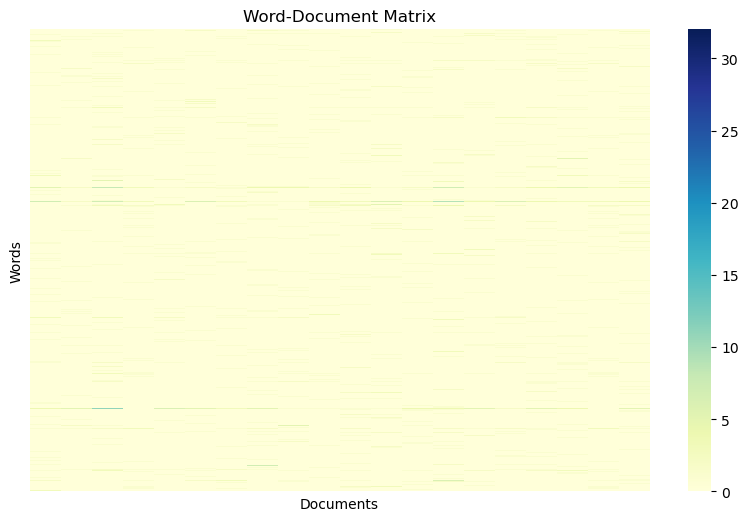

In [65]:
# Visualize the word-document matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(A, cmap="YlGnBu", xticklabels=False, yticklabels=False)
plt.title("Word-Document Matrix")
plt.xlabel("Documents")
plt.ylabel("Words")
plt.show()

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer instance
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the documents to compute TF-IDF scores
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Access the TF-IDF scores
tfidf_scores = tfidf_matrix.toarray()

In [62]:
from sklearn.metrics.pairwise import cosine_similarity

doc_index = documents.index(text) 

# Calculate cosine similarities
similarities = cosine_similarity(tfidf_matrix[doc_index], tfidf_matrix)

most_similar_indices = similarities.argsort()[0][-4:-1]

# Print the most similar documents
for idx in most_similar_indices:
    print(f"Similarity with Document {idx}: {similarities[0][idx]}")
    print(documents[idx])
    print()

Similarity with Document 16: 0.17989037159939436
indias demonetized currency may have found its way back into the system but analysts suggest that far from tarnishing prime minister narendra modis image the strategy will ultimately be viewed as a success
its important to remember that the demonetization move was intended more as a political move than as an economic one noted new yorkbased south asiafocused eurasia group analyst sasha riserkositsky
the drama of demonetization allowed prime minister narendra modi to demonstrate in a very visible way his commitment to fighting corruption and black money

earlier this week the annual report from the reserve bank of india rbi the countrys central bank found that a total of 1528 trillion rupees 239 billion worth of cancelled highvalue notes were deposited or exchanged for new money in the 10 months since the strategy was implemented  just one percent shy of the number in circulation before the plans came in

Similarity with Document 15: 0.20

In [63]:
# Initializing matrix B with zeros
B = np.zeros((N, N), dtype=int)

# Calculating the number of common words between each pair of documents
for i in range(N):
    for j in range(N):
        common_words = sum(A[:, i] * A[:, j])
        B[i, j] = common_words

# Set the diagonal values to the highest value
np.fill_diagonal(B, np.max(B))

# Print matrix B
print("Matrix B:")
print(B)


Matrix B:
[[1661  132  461  164  139  201  186  208  178  154  174  153  123  240
   221  192  196  226  164  217]
 [ 132 1661  353  109  125  127  145  155  130  103  128   93  104  142
   161  119  149  167  109  145]
 [ 461  353 1661  329  368  430  463  529  420  300  352  329  261  388
   508  416  535  473  329  462]
 [ 164  109  329 1661  110  150  190  202  136  136  202  167   90  242
   245  174  163  144  347  209]
 [ 139  125  368  110 1661  130  155  183  124  108  123  114   94  131
   174  121  146  147  110  156]
 [ 201  127  430  150  130 1661  190  201  164  138  165  154  115  199
   219  168  186  198  150  214]
 [ 186  145  463  190  155  190 1661  218  178  145  178  149  116  194
   231  177  191  193  190  205]
 [ 208  155  529  202  183  201  218 1661  203  155  191  162  115  213
   270  193  224  208  202  249]
 [ 178  130  420  136  124  164  178  203 1661  132  157  119  108  160
   189  146  171  200  136  185]
 [ 154  103  300  136  108  138  145  155  13